# Source

https://www.learnpytorch.io/

# Libraires

In [865]:
# !pip install plotly -U --quiet
# !pip install torchmetrics -U --quiet

In [866]:
import  torch
import  matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import  plotly.express as px
import  plotly.graph_objects as go

from    google.colab import drive
from    sklearn.model_selection import train_test_split
from    sklearn.preprocessing import StandardScaler
from    imblearn.over_sampling import SMOTE
from    imblearn.combine import SMOTEENN
from    torch import nn
from    torch import optim
from    torchmetrics import (Accuracy,
                             Precision,
                             Recall,
                             F1Score)

In [867]:
num_seed = 31
seed = np.random.seed(num_seed)

In [868]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [869]:
df_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv',
                      sep=',',
                      encoding='utf-8')

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [870]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [871]:
features = df_wine.drop('quality', axis=1).columns.to_list()

features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [872]:
target = df_wine.columns.to_list()[-1]

target

'quality'

In [873]:
df_wine[target].unique()

array([5, 6, 7, 4, 8, 3])

In [900]:
df_wine[target].replace([3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5],
                        inplace=True)

In [901]:
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


# Data visualization

In [902]:
fig = px.histogram(df_wine, x='quality')
fig.show()

It's a good practice resampling the data to have a equal balance

In [903]:
df_wine['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [904]:
maior_quantidade_qualidade = df_wine['quality'].value_counts().max()

maior_quantidade_qualidade

681

# Resampling data

In [905]:
X = df_wine.drop(columns='quality')

y = df_wine['quality']

In [906]:
smoteenn = SMOTEENN()

X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

In [907]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

In [908]:
print('Shape of X_smoteenn: ', X_smoteenn.shape)
print('Shape of y_smoteenn: ', y_smoteenn.shape)

print('Shape of X_smote: ', X_smote.shape)
print('Shape of y_smote: ', y_smote.shape)

Shape of X_smoteenn:  (2394, 11)
Shape of y_smoteenn:  (2394,)
Shape of X_smote:  (4086, 11)
Shape of y_smote:  (4086,)


In [909]:
df_wine_smoteenn = pd.DataFrame(np.column_stack((X_smoteenn, y_smoteenn)))

df_wine_smoteenn.rename(columns={0:  df_wine.columns[0],
                                 1:  df_wine.columns[1],
                                 2:  df_wine.columns[2],
                                 3:  df_wine.columns[3],
                                 4:  df_wine.columns[4],
                                 5:  df_wine.columns[5],
                                 6:  df_wine.columns[6],
                                 7:  df_wine.columns[7],
                                 8:  df_wine.columns[8],
                                 9:  df_wine.columns[9],
                                 10: df_wine.columns[10],
                                 11: df_wine.columns[11]},
                        inplace=True)

df_wine_smoteenn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0.0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0.0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0.0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0.0


In [910]:
fig = px.histogram(df_wine_smoteenn, x='quality')

fig.show()

In [911]:
df_wine_smote = pd.DataFrame(np.column_stack((X_smote, y_smote)))

df_wine_smote.rename(columns={0: df_wine.columns[0],
                              1: df_wine.columns[1],
                              2: df_wine.columns[2],
                              3: df_wine.columns[3],
                              4: df_wine.columns[4],
                              5: df_wine.columns[5],
                              6: df_wine.columns[6],
                              7: df_wine.columns[7],
                              8: df_wine.columns[8],
                              9: df_wine.columns[9],
                              10: df_wine.columns[10],
                              11: df_wine.columns[11]},
                          inplace=True)

df_wine_smote.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4081,10.131578,0.367763,0.519342,2.315789,0.070355,5.710527,16.000000,0.996283,3.171316,0.664211,11.532895,5.0
4082,6.383183,0.494099,0.165901,2.148198,0.062470,26.409911,47.530030,0.992920,3.591562,0.740000,13.357808,5.0
4083,8.462487,0.385000,0.424998,1.800000,0.072125,10.750079,19.000063,0.994459,3.221250,0.693750,12.087491,5.0
4084,9.466792,0.433682,0.446318,2.555957,0.072643,6.321295,16.440432,0.995064,3.172022,0.680830,11.924906,5.0
4085,7.881307,0.391125,0.390834,3.356986,0.075570,18.551743,38.495471,0.996715,3.370563,0.837568,12.781307,5.0


In [912]:
fig = px.histogram(df_wine_smote, x='quality')

fig.show()

# Scaling train test split

In [913]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote,
                                                            y_smote,
                                                            test_size=0.3,
                                                            random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.1,
                                                  random_state=seed)

print('\nShape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)

print('\nShape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

print('\nShape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)


Shape of X_train:  (2574, 11)
Shape of y_train:  (2574,)

Shape of X_test:  (1226, 11)
Shape of y_test:  (1226,)

Shape of X_val:  (286, 11)
Shape of y_val:  (286,)


In [914]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_val_scaled = scaler.transform(X_val)

Notice that we use .fit_transform() on X_train while we use .transform() on X_val and X_test.

**We do this because we want to scale the validation and test set with the same parameters as that of the train set to avoid data leakage.** fit_transform calculates scaling values and applies them while .transform only applies the calculated values.

Source: https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab

In [915]:
print('Shape of X_train_scaled: ', X_train_scaled.shape)
print('Shape of X_test_scaled: ', X_test_scaled.shape)
print('Shape of X_val_scaled: ', X_val_scaled.shape)

Shape of X_train_scaled:  (2574, 11)
Shape of X_test_scaled:  (1226, 11)
Shape of X_val_scaled:  (286, 11)


In [916]:
# X_train_scaled, y_train_scaled = np.array(X_train_scaled), np.array(y_train)

# X_val_scaled, y_val_scaled = np.array(X_val_scaled), np.array(y_val)

# X_test_scaled, y_test_scaled = np.array(X_test_scaled), np.array(y_test)

# Multilayer perceptron

## Tensors

In [917]:
# Check available hardware
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cpu


In [918]:
X_train_tensor = torch.from_numpy(X_train_scaled).float().to(device)

y_train_tensor = torch.LongTensor(y_train.values).to(device)


X_test_tensor = torch.from_numpy(X_test_scaled).float().to(device)

y_test_tensor = torch.LongTensor(y_test.values).to(device)


X_val_tensor = torch.from_numpy(X_val_scaled).float().to(device)

y_val_tensor = torch.LongTensor(y_val.values).to(device)


print(X_train_tensor)
print(y_train_tensor)
print('-' * 30)
print(X_test_tensor)
print(y_test_tensor)
print('-' * 30)
print(X_val_tensor)
print(y_val_tensor)

tensor([[-1.8526, -0.6801, -0.0638,  ...,  2.2940,  0.5199,  2.6944],
        [-0.4620,  1.4490, -1.1735,  ...,  0.6718, -0.9599, -0.1314],
        [ 0.4533,  0.8752, -1.3612,  ...,  0.1373,  1.0642, -1.1014],
        ...,
        [-0.6790,  1.7978, -1.2284,  ...,  1.1513, -0.8231, -0.2147],
        [-0.8254,  0.0351, -1.3612,  ...,  0.5231, -1.1958, -0.3297],
        [-0.2774,  0.4449, -0.3124,  ..., -0.5058, -0.9447, -0.6727]])
tensor([5, 0, 3,  ..., 0, 2, 2])
------------------------------
tensor([[-0.0197, -0.3350,  0.7283,  ..., -0.4626,  0.2060, -0.0470],
        [-0.5319,  0.8203, -0.8928,  ..., -0.1196, -0.8911, -0.8559],
        [-0.2165, -0.6205,  0.4368,  ...,  0.0730, -1.2585, -1.1014],
        ...,
        [-0.5819,  0.0761, -0.0627,  ..., -0.2486, -0.6308, -0.7584],
        [ 1.8249, -1.2254,  1.1800,  ..., -0.8273,  0.3210,  0.0402],
        [-0.6898,  1.7226, -1.2136,  ...,  1.0638, -0.8305, -0.2401]])
tensor([4, 0, 2,  ..., 3, 4, 0])
------------------------------
tens

In [919]:
input_size = X.shape[1]

hidden_size = 32

output_size = len(y.unique())

In [920]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_size (int): Number of input features to the model.
            out_features   (int): Number of output features of the model
            (how many classes there are).
            hidden_size   (int): Number of hidden units between layers, default 8.
        """

        super(WineClassifier, self).__init__()

        # Neural Net architecture
        self.neural_network = nn.Sequential(nn.Linear(in_features=input_size,
                                                      out_features=hidden_size),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_size,
                                                      out_features=hidden_size),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_size,
                                                      out_features=output_size),
                                            nn.Softmax(dim=1))

    def forward(self, x):

        return self.neural_network(x)

## Model

In [921]:
args = {'batch_size': 5,
        'num_workers': 2,
        'num_classes': output_size,
        'lr': 0.1,
        'weight_decay': 0.0005,
        'epochs': 1000}

In [922]:
model = WineClassifier(input_size, hidden_size, output_size).to(device)

print(model)

WineClassifier(
  (neural_network): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=6, bias=True)
    (5): Softmax(dim=1)
  )
)


In [923]:
criterion = nn.CrossEntropyLoss().to(device)  # Loss


model_params = model.parameters()

optimizer = optim.Adam(model_params, lr=args['lr'], weight_decay=args['weight_decay'])

## Training the model

In [924]:
accuracy = Accuracy(task='multiclass', num_classes=output_size) * 100

In [925]:
# Fit the model
torch.manual_seed(num_seed)

train_losses = {}
test_losses = {}

train_accuracies = {}
test_accuracies = {}

for epoch in range(args['epochs']):
    # Training
    model.train()

    # 1. Forward pass
    y_pred = model(X_train_tensor) # model outputs raw logits
    # y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)

    # 2. Calculate loss and accuracy
    loss = criterion(y_pred, y_train_tensor)
    acc = accuracy(y_pred, y_train_tensor)

    # train_losses.append([epoch, loss.item()])
    train_losses[epoch] = loss.item()
    train_accuracies[epoch] = acc.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test_tensor)
    #   test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = criterion(test_pred, y_test_tensor)
      test_acc = accuracy(test_pred, y_test_tensor)

      test_losses[epoch] = test_loss.item()
      test_accuracies[epoch] = test_acc.item()

    # Print out what's happening
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 1.79122, Acc: 19.74% | Test Loss: 1.76710, Test Acc: 30.83%
Epoch: 10 | Loss: 1.47694, Acc: 56.06% | Test Loss: 1.45776, Test Acc: 57.99%
Epoch: 20 | Loss: 1.40622, Acc: 63.71% | Test Loss: 1.39091, Test Acc: 65.17%
Epoch: 30 | Loss: 1.33047, Acc: 71.91% | Test Loss: 1.34612, Test Acc: 69.41%
Epoch: 40 | Loss: 1.32769, Acc: 72.77% | Test Loss: 1.32326, Test Acc: 71.53%
Epoch: 50 | Loss: 1.28049, Acc: 77.58% | Test Loss: 1.29281, Test Acc: 74.80%
Epoch: 60 | Loss: 1.26237, Acc: 78.98% | Test Loss: 1.27980, Test Acc: 77.08%
Epoch: 70 | Loss: 1.25367, Acc: 80.38% | Test Loss: 1.27701, Test Acc: 77.73%
Epoch: 80 | Loss: 1.24951, Acc: 80.73% | Test Loss: 1.27111, Test Acc: 78.14%
Epoch: 90 | Loss: 1.24161, Acc: 81.97% | Test Loss: 1.26302, Test Acc: 78.47%
Epoch: 100 | Loss: 1.23663, Acc: 82.44% | Test Loss: 1.26001, Test Acc: 79.36%
Epoch: 110 | Loss: 1.23709, Acc: 82.13% | Test Loss: 1.25815, Test Acc: 79.85%
Epoch: 120 | Loss: 1.22177, Acc: 83.95% | Test Loss: 1.25373, T

In [926]:
list_train_accuracies = sorted(train_accuracies.items())

x_train_accuracies, y_train_accuracies = zip(*list_train_accuracies)

px.line(x=x_train_accuracies, y=y_train_accuracies, title='Train accuracies')

In [927]:
list_train_losses = sorted(train_losses.items())

x_train_losses, y_train_losses = zip(*list_train_losses)

px.line(x=x_train_losses, y=y_train_losses, title='Train losses')

In [928]:
list_test_accuracies = sorted(test_accuracies.items())

x_test_accuracies, y_test_accuracies = zip(*list_test_accuracies)

px.line(x=x_test_accuracies, y=y_test_accuracies, title='Test accuracies')

In [929]:
list_test_losses = sorted(test_losses.items())

x_test_losses, y_test_losses = zip(*list_test_losses)

px.line(x=x_test_losses, y=y_test_losses, title='Test losses')

## Predictions

In [930]:
model.eval()

y_pred_probs  = model(X_test_tensor)

y_pred_probs

tensor([[6.3595e-07, 2.1517e-05, 3.0897e-04, 3.4856e-02, 9.6468e-01, 1.3303e-04],
        [9.9946e-01, 2.5785e-05, 5.0599e-04, 9.0948e-06, 8.0585e-12, 9.7526e-08],
        [5.3993e-16, 1.5158e-06, 9.9994e-01, 6.1717e-05, 9.3801e-13, 1.0705e-16],
        ...,
        [5.5227e-10, 8.1205e-03, 1.0174e-01, 8.9013e-01, 5.4718e-08, 2.9437e-09],
        [1.9954e-08, 2.3548e-10, 3.6528e-10, 4.8969e-06, 9.9999e-01, 1.2657e-07],
        [9.9939e-01, 6.0700e-04, 1.5752e-07, 2.1203e-11, 1.0505e-07, 1.2310e-08]],
       grad_fn=<SoftmaxBackward0>)

## Metrics

In [931]:
y_preds = y_pred_probs.argmax(dim=1)

acurracy_model = accuracy(y_test_tensor, y_preds)

# Compare first 10 model preds and test labels
print(f'Predictions: {y_preds[:10]}\nLabels: {y_test_tensor[:10]}')
print(f'Test accuracy: {acurracy_model:.2f}%')

Predictions: tensor([4, 0, 2, 0, 2, 5, 2, 2, 1, 3])
Labels: tensor([4, 0, 2, 0, 2, 5, 2, 3, 1, 3])
Test accuracy: 81.57%


**Precision**

How many of predicted positive are actual positive

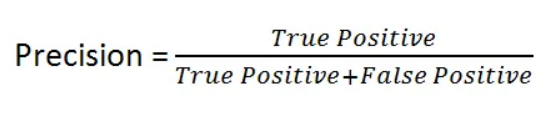

In [932]:
precision = Precision(task='multiclass', average='macro', num_classes=output_size) * 100

precision_model = precision(y_test_tensor, y_preds)

print(f'Test precision: {precision_model:.2f}%')

Test precision: 80.79%


**Recall**

How many of the actual positives our model capture through labeling it as positive (True Positive)

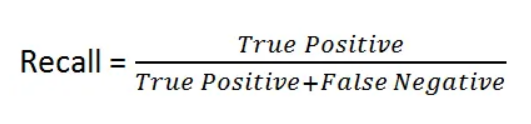

In [933]:
recall = Recall(task='multiclass', num_classes=output_size) * 100

recall_model = recall(y_test_tensor, y_preds)

print(f'Test recall: {recall_model:.2f}%')

Test recall: 81.57%


**F1 Score**
Gives a balance between Precision and Recall.

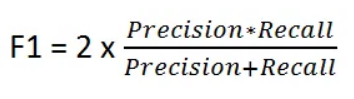

In [934]:
f1_score = F1Score(task='multiclass', num_classes=output_size) * 100

f1_score_model = f1_score(y_test_tensor, y_preds)

print(f'Test F1 score: {f1_score_model:.2f}%')

Test F1 score: 81.57%


# Validation

In [935]:
y_pred_probs_val  = model(X_val_tensor)

y_pred_probs_val

tensor([[9.9704e-08, 2.3910e-11, 1.8296e-08, 3.3098e-05, 1.7438e-02, 9.8253e-01],
        [4.6348e-07, 9.6693e-01, 2.0381e-02, 1.1652e-02, 1.0337e-03, 1.1008e-08],
        [9.7993e-01, 2.8142e-03, 1.5333e-02, 1.2356e-03, 6.9029e-04, 1.4553e-06],
        ...,
        [8.9043e-08, 9.5452e-01, 4.1789e-03, 3.3767e-02, 7.5380e-03, 1.0225e-09],
        [5.6127e-08, 1.4180e-12, 1.0380e-12, 1.4098e-05, 9.9998e-01, 8.9048e-06],
        [9.9743e-01, 2.4881e-03, 6.8679e-05, 3.1858e-06, 5.2277e-06, 2.8091e-07]],
       grad_fn=<SoftmaxBackward0>)

## Metrics

In [936]:
y_preds_val = y_pred_probs_val.argmax(dim=1)

acurracy_model_val = accuracy(y_val_tensor, y_preds_val)

print(f'Validation accuracy: {acurracy_model_val:.2f}%')

Validation accuracy: 85.66%


In [937]:
precision_val = Precision(task='multiclass', average='macro', num_classes=output_size) * 100

precision_model_val = precision(y_val_tensor, y_preds_val)

print(f'Validation precision: {precision_model_val:.2f}%')

Validation precision: 85.22%


In [938]:
recall_val = Recall(task='multiclass', num_classes=output_size) * 100

recall_model_val = recall(y_val_tensor, y_preds_val)

print(f'Validation recall: {recall_model_val:.2f}%')

Validation recall: 85.66%


In [939]:
f1_score_val = F1Score(task='multiclass', num_classes=output_size) * 100

f1_score_model_val = f1_score(y_val_tensor, y_preds_val)

print(f'Validation F1 score: {f1_score_model_val:.2f}%')

Validation F1 score: 85.66%
